In [128]:
import numpy as np
import xarray as xr
import sys
sys.path.insert(1, '../../../lkf_tools/lkf_tools/')
from dataset import *
sys.path.insert(1, '../../functions/')
from statistics_functions import *
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.rcParams.update({'font.size':16})
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime
import cmocean
import warnings
warnings.filterwarnings('ignore')

In [129]:
path = '/work/bk1377/a270230/'
path_nc   = path + f'interpolated_fesom_output/4km/'
path_ds   = path + f'datasets/4km/'
path_lkfs = path + 'lkfs/dump/'
path_stat = path + 'statistics/'
path_imgs = path + 'imgs/'

In [130]:
year = 2015
file = xr.open_dataset(path_nc + f'{year}_4km.nc')
lkf_data = np.load(path_ds + f'ds_{year}_4km.npy', allow_pickle=True)[0]
LKFs = np.load(path_stat + f'LKFs_4km.npy', allow_pickle=True)[0]

In [133]:
def plot(day, var='ice', vmax_def=0.6):
    fig = plt.figure(figsize=(11,6))
    axs = [fig.add_subplot(1,2,i, projection=ccrs.Orthographic(0, 90)) for i in [1,2]]

    if var=='ice':
        im = axs[0].pcolormesh(lon_4km, lat_4km, file.H.isel(time=day)[a:b,c:d], transform=ccrs.PlateCarree(),
                               cmap = cmocean.cm.ice, vmin=0, vmax=3)
        label = 'sea ice thickness /m'
    else:
        im = axs[0].pcolormesh(lon_4km, lat_4km, lkf_data.calc_eps(day-1)[0][:,:-70], transform=ccrs.PlateCarree(),
                               cmap = 'summer', vmin=0, vmax=vmax_def)
        label = r'sea ice deformation /day$^{-1}$'
    plt.colorbar(im, ax=axs[0], orientation='horizontal', fraction=0.055, pad=0.02, label=label)
    
    im = axs[1].pcolormesh(lon_4km, lat_4km, file.H.isel(time=day)[a:b,c:d], transform=ccrs.PlateCarree(),
                       cmap = cmocean.cm.ice, vmin=0, vmax=3)
    plt.colorbar(im, ax=axs[1], orientation='horizontal', fraction=0.055, pad=0.02, label='sea ice thickness /m')
    
    for ax in axs:
        ax.add_feature(cfeature.LAND, zorder=2, edgecolor='black')
        
    lkfs = np.load(lkf_data.lkfpath.joinpath('lkf_%s_%03i.npy' %(lkf_data.netcdf_file.split('/')[-1].split('.')[0],(day))),allow_pickle=True)
    for ind_lkf, lkf in enumerate(lkfs):
        if np.min(lkf[:,2])<-150 and np.max(lkf[:,2]>150):
            lkf[lkf[:,2]<0,2]+=360

        ax.plot(lkf[:,2], lkf[:,3], transform=ccrs.PlateCarree(), linewidth=1, color='red')
        if True:
            lkf_type = LKFs[f'{year} daily'][f'{day}']['lead or ridge'][ind_lkf]
            if lkf_type==1: color='b'
            if lkf_type==2: color='r'
            if lkf_type==3: color='k'
        
            ax.plot(lkf[:,2], lkf[:,3], transform=ccrs.PlateCarree(), linewidth=1, color=color)
    
    fig.tight_layout()

In [107]:
day = 85
lkf_data = process_dataset(netcdf_file = path_nc + f'{year}_4km.nc',
                           output_path = path_lkfs,
                           dog_thres = 0.01,
                           t_red = 1)

lkf_data.detect_lkfs(indexes=[day-1], use_eps=True)

  -->  Compute dxu and dyu from lon,lat using SSMI projection
Compute deformation rates and detect features for day 85
Start detection routines


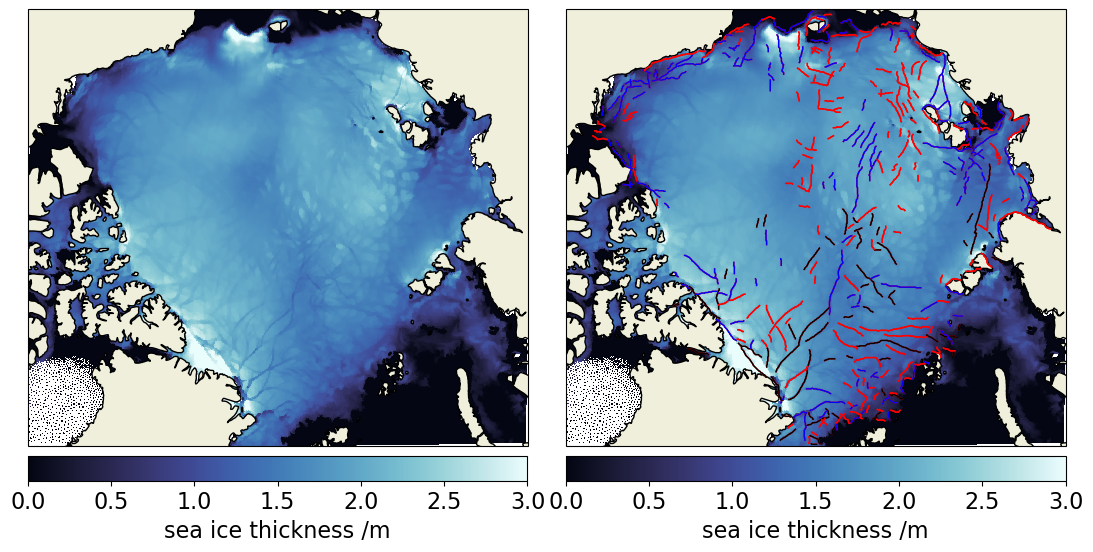

In [134]:
plot(200, 'ice', 0.1)

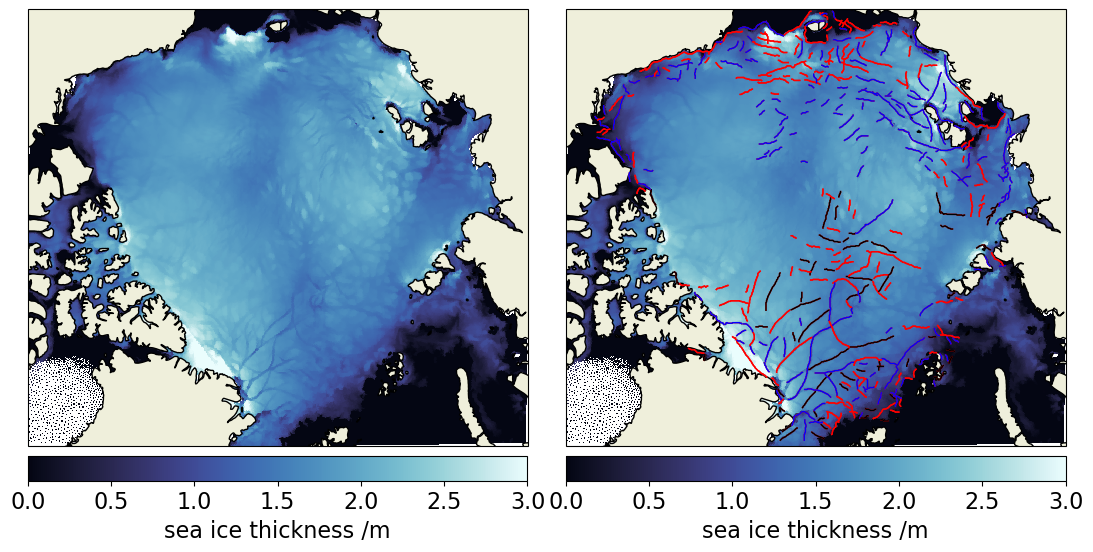

In [136]:
plot(200, 'deformation', 0.1)